# Read Me

Module Name: Grassland Curing Data Time Series

Date of creation: 17/05/2022

Name of creator of module : GM

History of modification:
    Last modification: 19/05
    Modifications: Raw script to Juypter notebook 
    - added a loop for multiple fwd and changes a few variable names 

Summary of what the module does: 

Reads fire weather district (fwd) shape files as a dataframe 

Reads in avaliable MODIS curing data from 2015-2020

Loops over the day of year, for each year every 8 days

Loop opens MODIS data using xarray (xr) and clips array by the fire weather district shape files

Generates a basic plot for the array for curing data over time

typical calls: file_path = '/g/data/ct18/Historical_Curing/BOM_raw_daily_input_for_VISCA/unzipped/vic/'

file path = curing-filled_modis-mapvictoria_8day_500m_vic_%s.tif

fwd_shapefile_path = '/g/data/ct18/dw4060/viirs/inputfiles/boundaries/FWFDistricts_MapID_WGS84_May2022.shp'

# Packages

In [1]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import geopandas
import datetime
import glob
import os
import xarray as xr

# Read data

In [2]:
#read in fire weather district shape files (fwd)
fwd_shapefile_path = '/g/data/ct18/dw4060/viirs/inputfiles/boundaries/FWFDistricts_MapID_WGS84_May2022.shp'
df = geopandas.read_file(fwd_shapefile_path)
#print(type(df))
#print(df.head(n=10))
#print(df.tail(n=10))
#read in MODIS curing data
file_path = '/g/data/ct18/Historical_Curing/BOM_raw_daily_input_for_VISCA/unzipped/vic/'

# Constants

In [3]:
fwd_districts = ["Wimmera", "Mallee", "South West", "Northern Country", "North Central", "Central", "North East", "West and South Gippsland", "East Gippsland"]

fwd_geometry = df[df['DIST_NAME'] == 'Mallee'].geometry.values

#MODIS data
year = 2015
t0 = datetime.datetime(year, 7, 1)
time_array = []
mean_curing_value = []

# Analysis and loops

In [8]:
for doy in range(0, 365, 8):
    current_date = t0 + datetime.timedelta(days=doy)
    fns = glob.glob(os.path.join(file_path, "curing-filled_modis-mapvictoria_8day_500m_vic_%s.tif" % current_date.strftime('%Y%m%d')))
    print("fns", fns)
    #cheking file exists
    if len(fns) == 1: 
        #opening the file using xr
        ds = xr.open_dataset(fns[0])
        #taking the grasskand cuirng data (gci) and clipping I with the geometry of the fwds
        gci_clipped_to_fwd = ds.rio.clip(fwd_geometry, df.crs)
        #calculte the mean for the clipped gci
        print(doy, current_date, fns[0], gci_clipped_to_fwd.mean())
        #determine mean curing values for the Mallee fwd and structure them as an array starting from the first idex
        mean_curing_value.append(gci_clipped_to_fwd.mean().to_array().values[0])
        #add current date variable to the time arrazy variable 
        time_array.append(current_date)
        #print('mean_curing_value', mean_curing_value)
        #print('time_array', time_array)

0 2015-07-01 00:00:00 /g/data/ct18/Historical_Curing/BOM_raw_daily_input_for_VISCA/unzipped/vic/curing-filled_modis-mapvictoria_8day_500m_vic_20150701.tif <xarray.Dataset>
Dimensions:      ()
Coordinates:
    spatial_ref  int64 0
Data variables:
    band_data    float32 14.41
8 2015-07-09 00:00:00 /g/data/ct18/Historical_Curing/BOM_raw_daily_input_for_VISCA/unzipped/vic/curing-filled_modis-mapvictoria_8day_500m_vic_20150709.tif <xarray.Dataset>
Dimensions:      ()
Coordinates:
    spatial_ref  int64 0
Data variables:
    band_data    float32 12.53
16 2015-07-17 00:00:00 /g/data/ct18/Historical_Curing/BOM_raw_daily_input_for_VISCA/unzipped/vic/curing-filled_modis-mapvictoria_8day_500m_vic_20150717.tif <xarray.Dataset>
Dimensions:      ()
Coordinates:
    spatial_ref  int64 0
Data variables:
    band_data    float32 11.12
24 2015-07-25 00:00:00 /g/data/ct18/Historical_Curing/BOM_raw_daily_input_for_VISCA/unzipped/vic/curing-filled_modis-mapvictoria_8day_500m_vic_20150725.tif <xarray.Data

# Plots

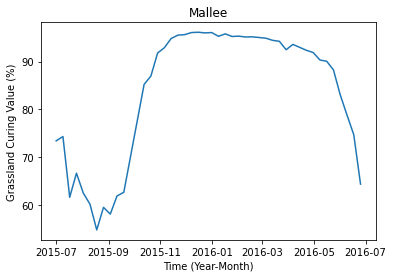

In [5]:
#plotting out array (you can also stor you plot as a variable/object to manipulate it further)
plt.plot(time_array,mean_curing_value)

plt.title('Mallee')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Grassland Curing Value (%)')
plt.show()
#plt.savefig("curing_timeline.png")


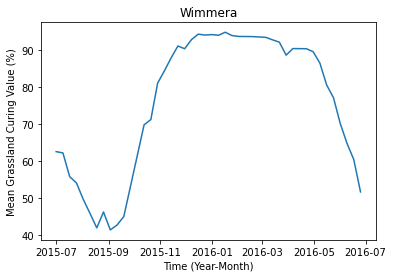

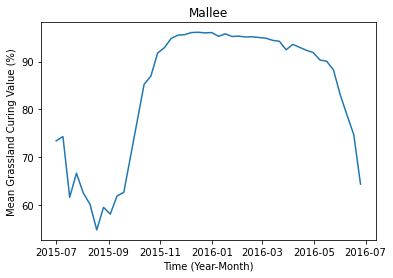

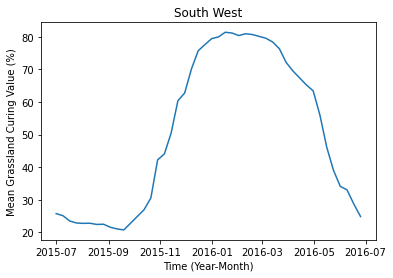

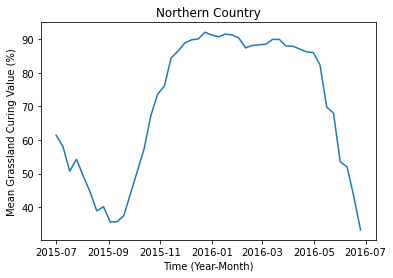

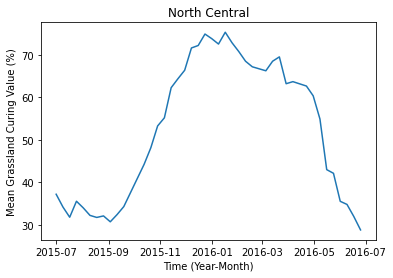

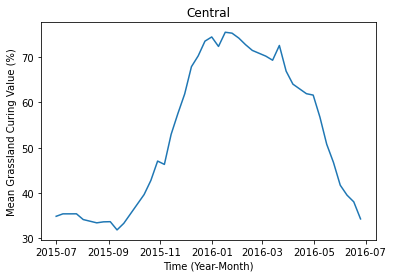

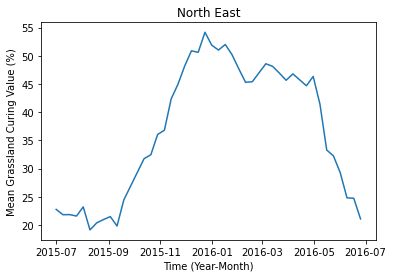

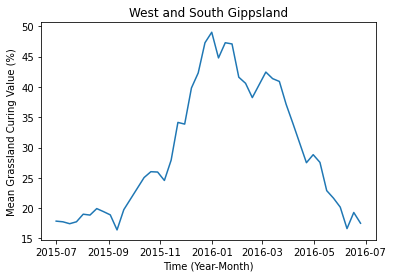

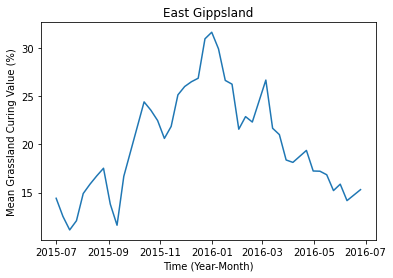

[[[datetime.datetime(2015, 7, 1, 0, 0), datetime.datetime(2015, 7, 9, 0, 0), datetime.datetime(2015, 7, 17, 0, 0), datetime.datetime(2015, 7, 25, 0, 0), datetime.datetime(2015, 8, 2, 0, 0), datetime.datetime(2015, 8, 10, 0, 0), datetime.datetime(2015, 8, 18, 0, 0), datetime.datetime(2015, 8, 26, 0, 0), datetime.datetime(2015, 9, 3, 0, 0), datetime.datetime(2015, 9, 11, 0, 0), datetime.datetime(2015, 9, 19, 0, 0), datetime.datetime(2015, 10, 13, 0, 0), datetime.datetime(2015, 10, 21, 0, 0), datetime.datetime(2015, 10, 29, 0, 0), datetime.datetime(2015, 11, 6, 0, 0), datetime.datetime(2015, 11, 14, 0, 0), datetime.datetime(2015, 11, 22, 0, 0), datetime.datetime(2015, 11, 30, 0, 0), datetime.datetime(2015, 12, 8, 0, 0), datetime.datetime(2015, 12, 16, 0, 0), datetime.datetime(2015, 12, 24, 0, 0), datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 9, 0, 0), datetime.datetime(2016, 1, 17, 0, 0), datetime.datetime(2016, 1, 25, 0, 0), datetime.datetime(2016, 2, 2, 0, 0), datetime

In [6]:
fwd_districts = ["Wimmera", "Mallee", "South West", "Northern Country", "North Central", "Central", "North East", "West and South Gippsland", "East Gippsland"]
total_data = []


#fwd_directory =[""]
#year = 2000
#for i in range(len(fwd_directory))


for name in range(len(fwd_districts)):
    fwd_geometry = df[df['DIST_NAME'] == fwd_districts[name]].geometry.values
    year = 2015
    t0 = datetime.datetime(year, 7, 1)
    time_array = []
    mean_curing_value = []
    for doy in range(0, 365, 8):
        current_date = t0 + datetime.timedelta(days=doy)
        fns = glob.glob(os.path.join(file_path, "curing-filled_modis-mapvictoria_8day_500m_vic_%s.tif" % current_date.strftime('%Y%m%d')))
        #print("fns", fns)
    #cheking file exists
        if len(fns) == 1: 
        #opening the file using xr
            ds = xr.open_dataset(fns[0])
            #taking the grassland curing data (gci) and clipping I with the geometry of the fwds
            gci_clipped_to_fwd = ds.rio.clip(fwd_geometry, df.crs)
            #calculte the mean for the clipped gci
            
            #determine mean curing values for the all the fwds and structure them as an array starting from the first idex
            mean_curing_value.append(gci_clipped_to_fwd.mean().to_array().values[0])
            #add current date variable to the time arrazy variable 
            time_array.append(current_date)
            

#plotting out array (you can also stor you plot as a variable/object to manipulate it further)
    plt.plot(time_array,mean_curing_value)

    plt.title(fwd_districts[name])
    plt.xlabel('Time (Year-Month)')
    plt.ylabel('Mean Grassland Curing Value (%)')
    plt.show()
    total_data.append([time_array, mean_curing_value])
#plt.savefig("curing_timeline.png")

print(total_data)
    